## Data Importing and Structure Check

In [179]:
#importing of libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline 


In [180]:
#import library to ignore warnings

import warnings
warnings.filterwarnings('ignore')

In [181]:
#importing source data

data = pd.read_csv('CardioGoodFitness.csv')

In [182]:
#checking of the first data sample

data.head(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [183]:
#checking data shape

data.shape

(180, 9)

In [184]:
#checking data info/type

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
Product          180 non-null object
Age              180 non-null int64
Gender           180 non-null object
Education        180 non-null int64
MaritalStatus    180 non-null object
Usage            180 non-null int64
Fitness          180 non-null int64
Income           180 non-null int64
Miles            180 non-null int64
dtypes: int64(6), object(3)
memory usage: 12.7+ KB


In [185]:
#checking NA values

data.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [186]:
#it can be found that there are no null values inside the dataframe, hence no modification required to cater for missing values

In [187]:
#this shows the general statistic values of the parameters

data.describe(include = "all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,TM195,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


## Univariate Analysis

### Analysis on Product

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64

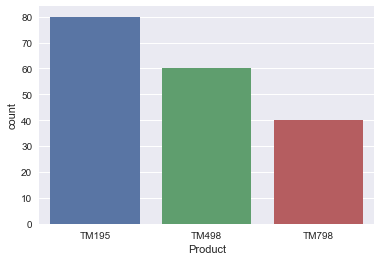

In [188]:
#code to create countplot of the Product column
sns.countplot(data['Product'])

#code to count the number of each unique variables each column
data['Product'].value_counts()

There are more data on TM195 product and less data on TM798 product.

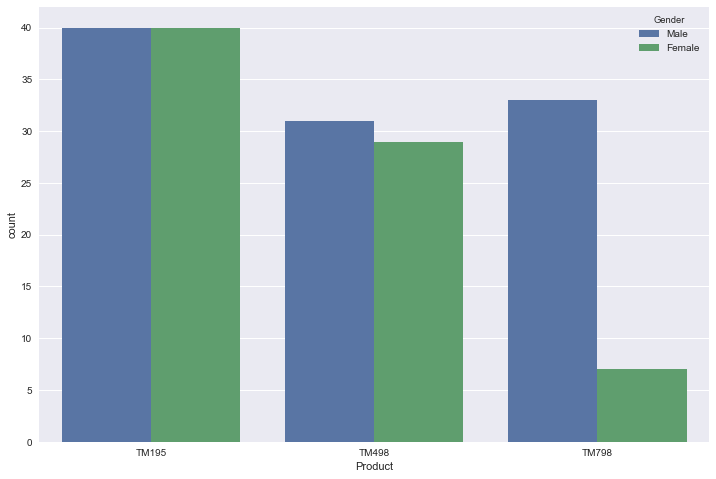

In [189]:
#generating a count plot while differentiating customers based on gender

plt.figure(figsize=(12,8))
sns.countplot(data['Product'], hue=data['Gender'])

It can be found that there are more users on TM195 product for both genders. For TM798, there are much more male users.

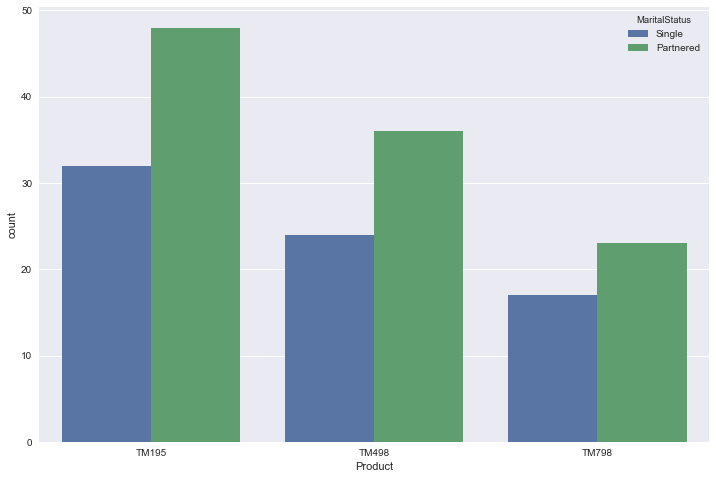

In [190]:
#generating a count plot while differentiating customers based on marital status

plt.figure(figsize=(12,8))
sns.countplot(data['Product'], hue=data['MaritalStatus'])

It can be found that there are more married users for the three products.

In [191]:
#creation of function for univariate numerical analysis
#output of function will be a boxplot, a histogram, mean, Q1, Q2, Q3, IQ, Max, Min, and Range values

def boxhist(input):
    f, (ax_hist2, ax_box2) = plt.subplots(nrows = 2, sharex = True, figsize = (12,8)) #2 subplots with sharing of x values
    sns.distplot(input,ax=ax_hist2)
    sns.boxplot(input,ax=ax_box2,showmeans=True) 
    ax_hist2.axvline(np.mean(input), c='g', linestyle='-') #green line showing mean
    ax_hist2.axvline(np.median(input), c='yellow', linestyle='-') #yellow line showing median
    print ("Mean = " ,input.mean())
    print ("Q1 = ", input.quantile(0.25))
    print ("Q2 = ", input.quantile(0.5))
    print ("Q3 = ", input.quantile(0.75))
    print ("IQR = ", input.quantile(0.75)-input.quantile(0.25))
    print ("Max = ", input.max())
    print ("Min = ", input.min())
    print ("Range = ", input.max()-input.min())

### Analysis on Age

Mean =  28.788888888888888
Q1 =  24.0
Q2 =  26.0
Q3 =  33.0
IQR =  9.0
Max =  50
Min =  18
Range =  32


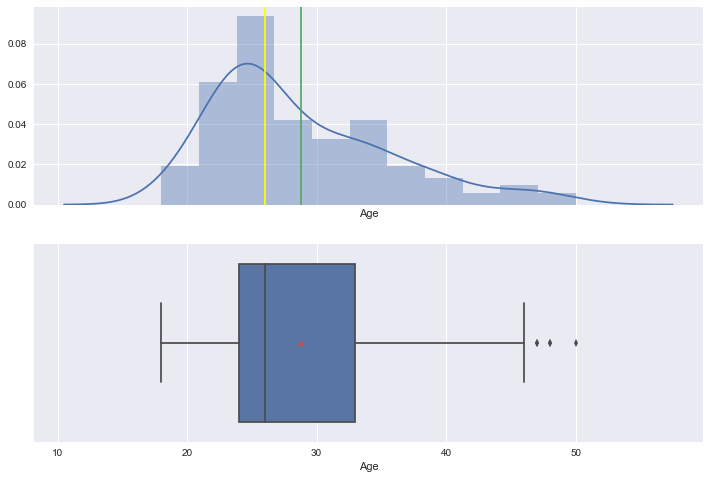

In [219]:
#using the created function to show a boxplot, a histogram, mean, Q1, Q2, Q3, IQ, Max, Min, and Range values for column

boxhist(data['Age']) 

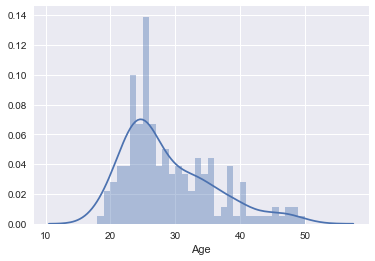

In [274]:
#applying range as bins, we can see the number for each age

sns.distplot(data['Age'], bins=32)

#### Observations
- The distribution of age is right skewed
- Many of the user are of younger age. The Q1 is 24, Q2 is 26 and Q3 is 33. The mean is 28.78.

### Analysis on Gender

Male      104
Female     76
Name: Gender, dtype: int64

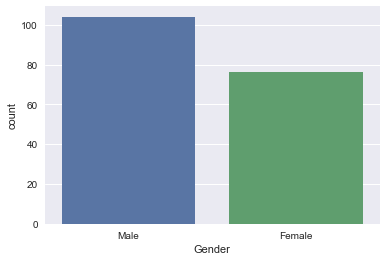

In [193]:
#countplot is used as gender is not a numerical data

sns.countplot(data['Gender'])

data['Gender'].value_counts()

There are more observations for male compared to female.

### Analysis on Marital Status

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

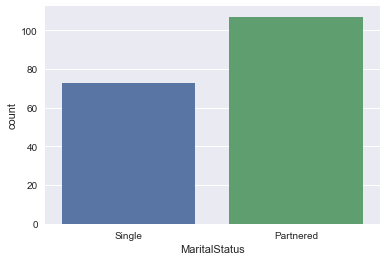

In [194]:
#countplot is used again as this is not a numerical data

sns.countplot(data['MaritalStatus'])

data['MaritalStatus'].value_counts()

There are more observations for those who have partnered than single. Partnered users are around 1.5 times single users.

### Analysis on Education

Mean =  15.572222222222223
Q1 =  14.0
Q2 =  16.0
Q3 =  16.0
IQR =  2.0
Max =  21
Min =  12
Range =  9


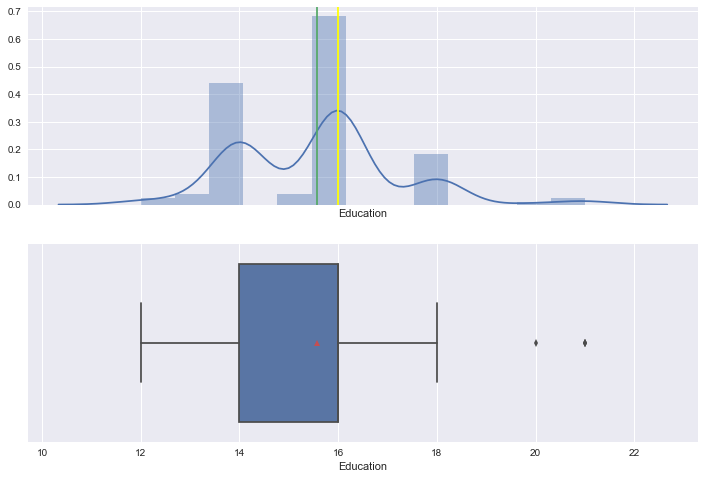

In [195]:
#calling upon the function to show box plot and histogram

boxhist(data['Education'])

In [196]:
#further check on distribution, high amount of people seems to be between 14-16 years of education

data['Education'].value_counts()

16    85
14    55
18    23
15     5
13     5
21     3
12     3
20     1
Name: Education, dtype: int64

#### Observations
- At least 80% of users have 14-16 years of education
- Very few outliers

### Analysis on Usage

Mean =  3.4555555555555557
Q1 =  3.0
Q2 =  3.0
Q3 =  4.0
IQR =  1.0
Max =  7
Min =  2
Range =  5


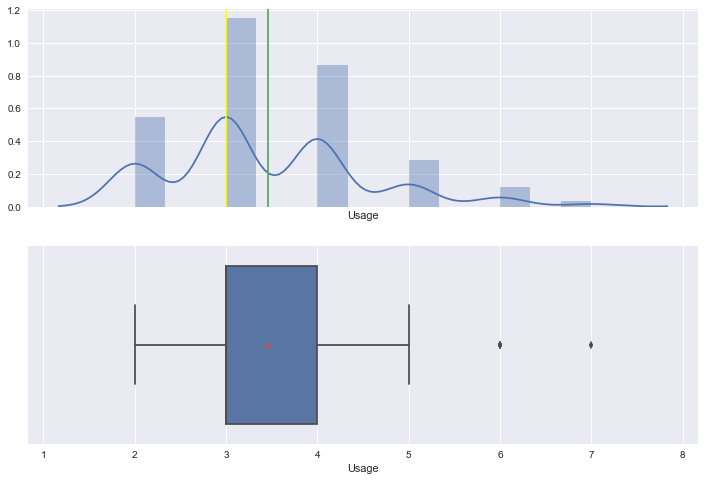

In [197]:
boxhist(data['Usage'])

In [198]:
data['Usage'].value_counts()

3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64

#### Observations
- 67% of customers expect to use around the treadmill 3-4 times per week
- Customers expect to use the treadmill at least 2 times per week
- There are outliers indicating usage of 6-7 times per week

### Analysis on Fitness

Mean =  3.311111111111111
Q1 =  3.0
Q2 =  3.0
Q3 =  4.0
IQR =  1.0
Max =  5
Min =  1
Range =  4


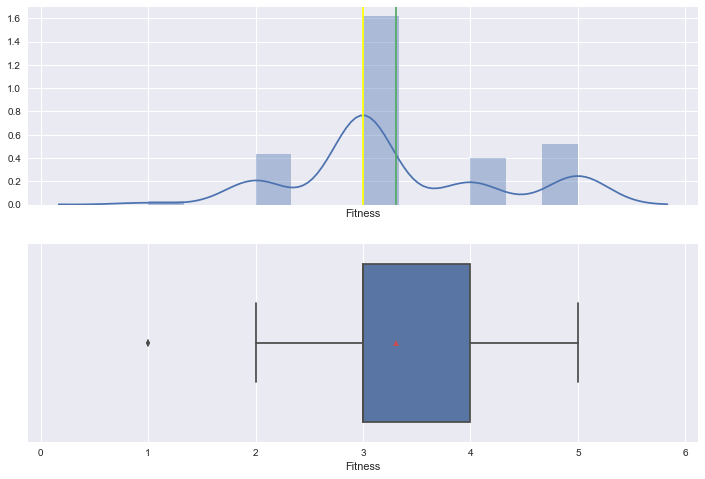

In [199]:
boxhist(data['Fitness'])

In [200]:
#frequency of fitness rating values

data['Fitness'].value_counts()

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

#### Observations
- Around 50% of customers rate their fitness level as 3 out of 5
- The distribution is somewhat left skewed, as more of the customers rate themselves as fit (more ratings of 4&5 than 1&2)

### Analaysis on Income

Mean =  53719.57777777778
Q1 =  44058.75
Q2 =  50596.5
Q3 =  58668.0
IQR =  14609.25
Max =  104581
Min =  29562
Range =  75019


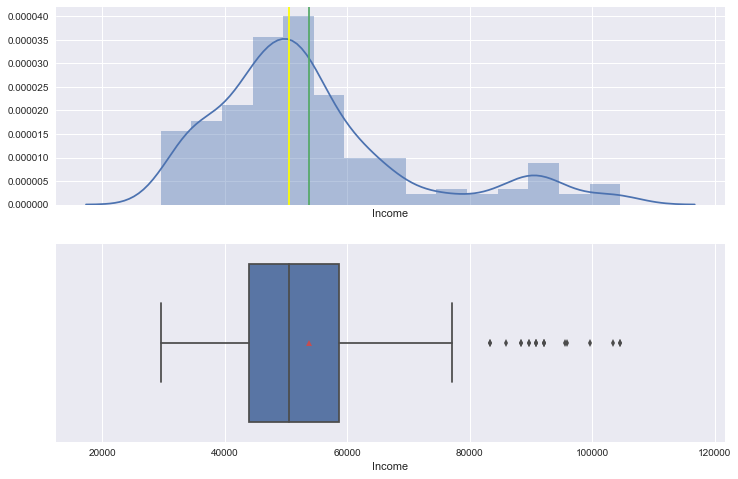

In [202]:
boxhist(data['Income'])

#there is no need to do a value count on income as there are too many unique values

#### Observations
- Distribution of Income is right skewed
- All of the users have an income
- Many have income between 44058.75 to 58668.0

### Analysis on Miles

Mean =  103.19444444444444
Q1 =  66.0
Q2 =  94.0
Q3 =  114.75
IQR =  48.75
Max =  360
Min =  21
Range =  339


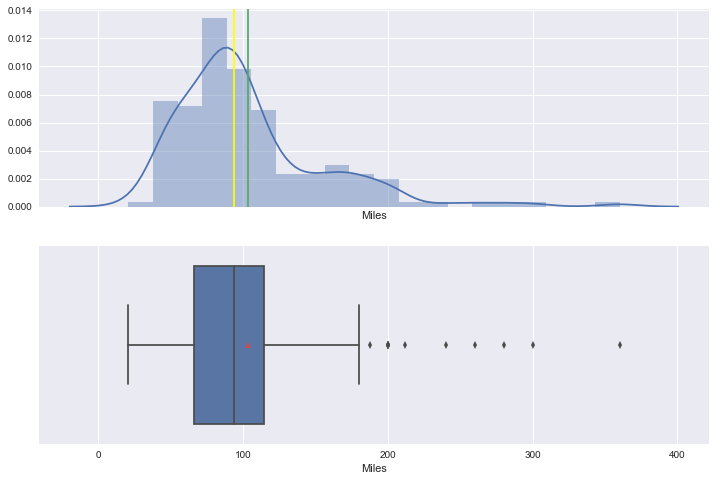

In [203]:
boxhist(data['Miles'])

#there is no need to do a value count as there are too many unique values

#### Observations
- The distribution is right skewed
- On average, users expect themselves to run 103.19 miles

## Bivariate Analysis

### Bivariate Scatter Plots

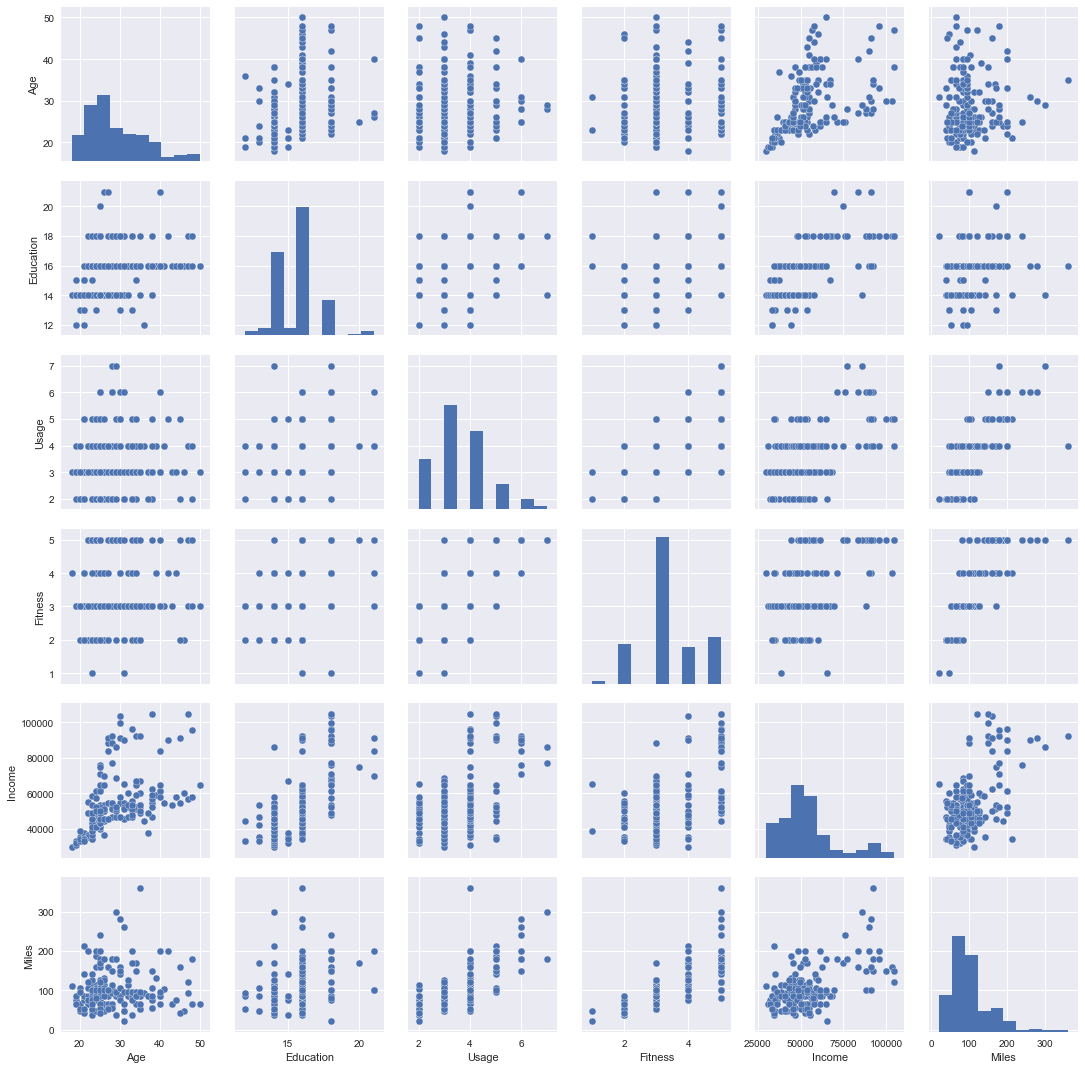

In [204]:
#creating a list of columns to be selected for pairplot creation
numm = ['Age','Education','Usage','Fitness','Income','Miles']

#creating a pairplot
sns.pairplot(data[numm])

### Correlation with Heatmap

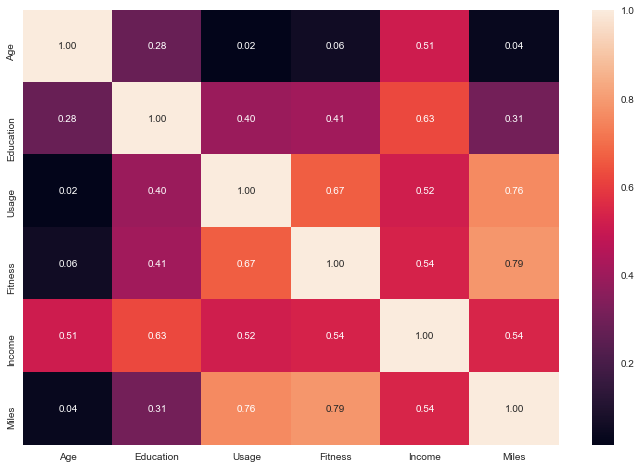

In [205]:
plt.figure(figsize=(12,8)) #defining figure size
corrr = data[numm].corr()
sns.heatmap(corrr, annot = True, 
        fmt=".2f", #rounding to 2 decimal values
        xticklabels=corrr.columns,
        yticklabels=corrr.columns)


#### Observations
- Self rated fitness levels, expected miles, and usage of product correlate to each other well
- As expected, education and income correlate well.
- As expected, age is somewhat correlated to income level.
- Income is also somewhat correlated to expected usage, expected miles and self rated fitness level.

### Usage across Product

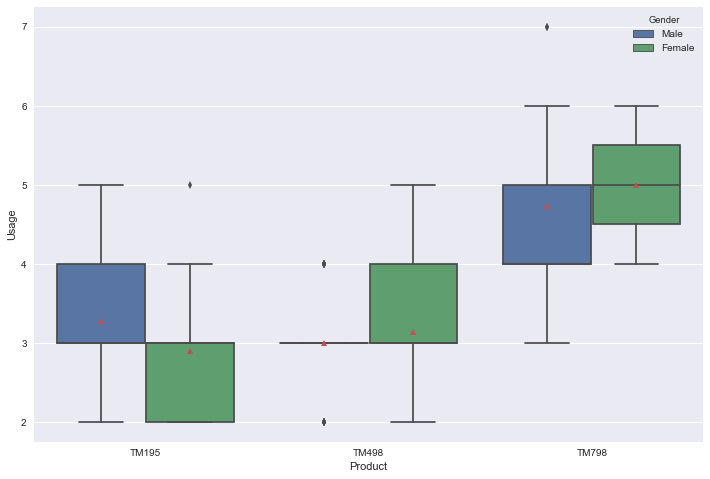

In [231]:
#generating a boxplot with product as x and usage as y, while differentiating customers based on gender

plt.figure(figsize=(12,8))
sns.boxplot(data['Product'],data['Usage'], hue = data['Gender'], showmeans=True)

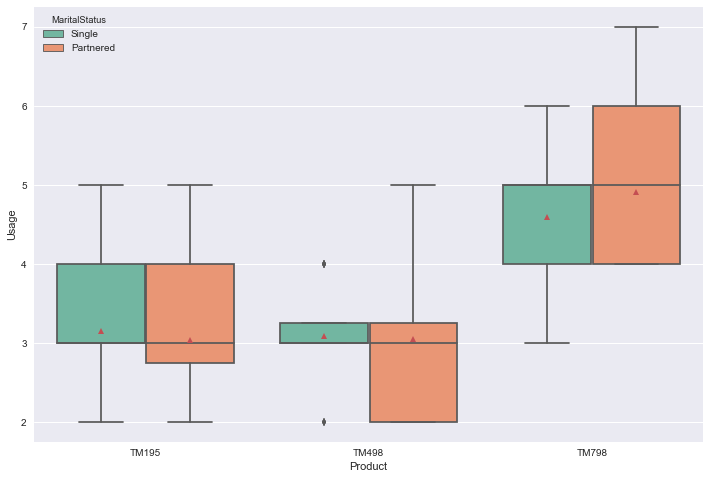

In [227]:
#generating a boxplot with product as x and usage as y, while differentiating customers based on marital status

plt.figure(figsize=(12,8))
sns.boxplot(data['Product'],data['Usage'], hue = data['MaritalStatus'], showmeans=True, palette="Set2")

In [239]:
#groupby can also be done to check exact values as per desired grouping

data.groupby('Product')['Usage'].mean()

Product
TM195    3.087500
TM498    3.066667
TM798    4.775000
Name: Usage, dtype: float64

In [240]:
data.groupby(by=['Product','Gender'])['Usage'].mean()

Product  Gender
TM195    Female    2.900000
         Male      3.275000
TM498    Female    3.137931
         Male      3.000000
TM798    Female    5.000000
         Male      4.727273
Name: Usage, dtype: float64

In [241]:
data.groupby(by=['Product','MaritalStatus'])['Usage'].mean()

Product  MaritalStatus
TM195    Partnered        3.041667
         Single           3.156250
TM498    Partnered        3.055556
         Single           3.083333
TM798    Partnered        4.913043
         Single           4.588235
Name: Usage, dtype: float64

#### Observations
- Users of TM798 expect to use the product more frequently, around 5 times per week on average.
- Women expect to use TM798 slightly more often than men.
- Married people expect to use TM798 slightly more than single people.
- Users of both TM195 and TM498 expect to use the product around 3 times per week on average, regardless of marital status.
- Men expect to use TM195 slightly more than women. 

### Income across Product

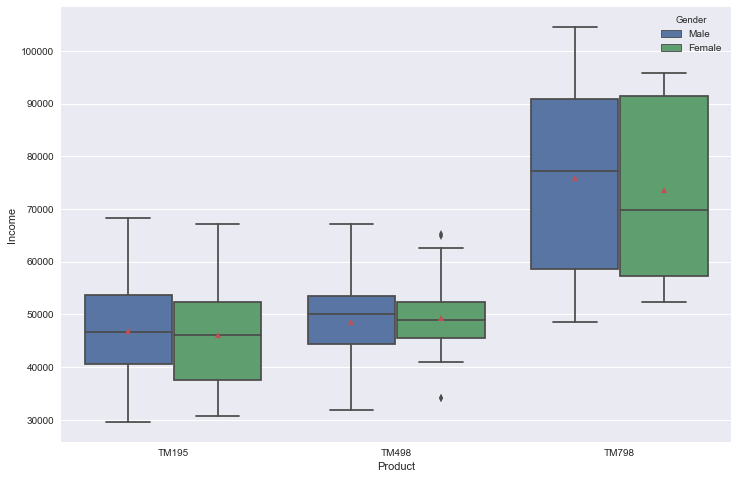

In [208]:
#generating a boxplot with product as x and income as y, while differentiating customers based on gender

plt.figure(figsize=(12,8))
sns.boxplot(data['Product'],data['Income'], hue = data['Gender'], showmeans=True)

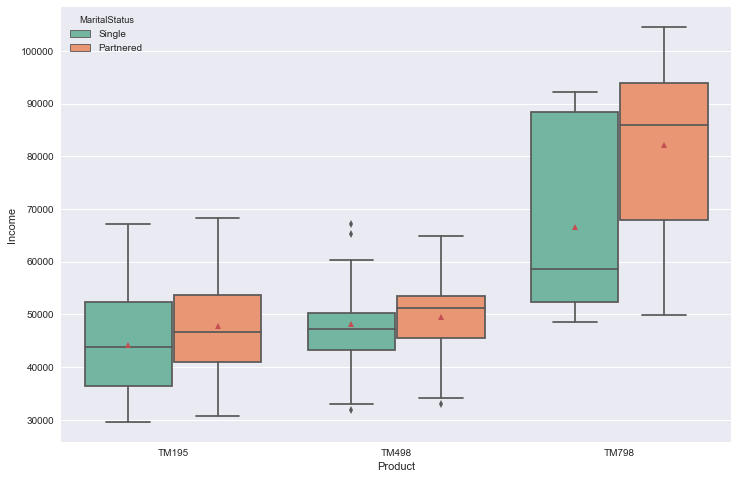

In [232]:
#generating a boxplot with product as x and income as y, while differentiating customers based on marital status

plt.figure(figsize=(12,8))
sns.boxplot(data['Product'],data['Income'], hue = data['MaritalStatus'], showmeans=True, palette="Set2")

In [242]:
data.groupby('Product')['Income'].mean()

Product
TM195    46418.025
TM498    48973.650
TM798    75441.575
Name: Income, dtype: float64

In [248]:
data.groupby(by=['Product','Gender'])['Income'].mean()

Product  Gender
TM195    Female    46020.075000
         Male      46815.975000
TM498    Female    49336.448276
         Male      48634.258065
TM798    Female    73633.857143
         Male      75825.030303
Name: Income, dtype: float64

In [253]:
data.groupby(by=['Product','MaritalStatus'])['Income'].mean()

Product  MaritalStatus
TM195    Partnered        47848.750000
         Single           44271.937500
TM498    Partnered        49522.666667
         Single           48150.125000
TM798    Partnered        82047.173913
         Single           66504.588235
Name: Income, dtype: float64

#### Observations
- It can be seen that the users of TM798 are of higher income, especially those who are partnered/married. 
- The users of TM195 and TM498 don't really have difference of income, although the users of TM498 generally have slightly higher income levels. Married users have slightly higher income. The income of men and women users for these two products are about the same.

### Age across Product

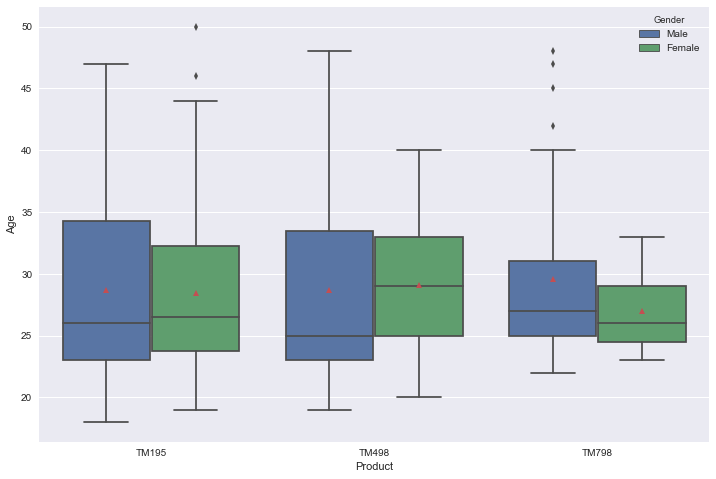

In [234]:
#generating a boxplot with product as x and age as y, while differentiating customers based on gender

plt.figure(figsize=(12,8))
sns.boxplot(data['Product'],data['Age'], hue = data['Gender'], showmeans=True)

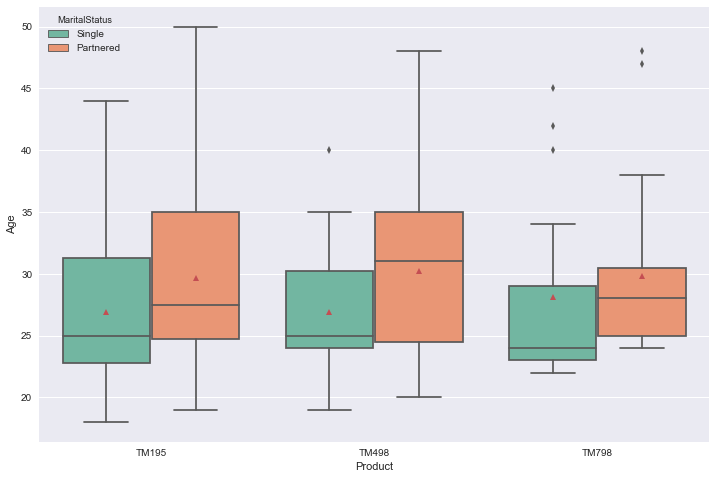

In [235]:
#generating a boxplot with product as x and age as y, while differentiating customers based on marital status

plt.figure(figsize=(12,8))
sns.boxplot(data['Product'],data['Age'], hue = data['MaritalStatus'], showmeans=True, palette="Set2")

In [245]:
data.groupby('Product')['Age'].mean()

Product
TM195    28.55
TM498    28.90
TM798    29.10
Name: Age, dtype: float64

In [249]:
data.groupby(by=['Product','Gender'])['Age'].mean()

Product  Gender
TM195    Female    28.450000
         Male      28.650000
TM498    Female    29.103448
         Male      28.709677
TM798    Female    27.000000
         Male      29.545455
Name: Age, dtype: float64

In [254]:
data.groupby(by=['Product','MaritalStatus'])['Age'].mean()

Product  MaritalStatus
TM195    Partnered        29.666667
         Single           26.875000
TM498    Partnered        30.222222
         Single           26.916667
TM798    Partnered        29.826087
         Single           28.117647
Name: Age, dtype: float64

In [258]:
data.groupby('MaritalStatus')['Age'].mean()

MaritalStatus
Partnered    29.887850
Single       27.178082
Name: Age, dtype: float64

In [259]:
data.groupby('Gender')['Age'].mean()

Gender
Female    28.565789
Male      28.951923
Name: Age, dtype: float64

#### Observations
- Generally there aren't much difference in the age of the users of the three products. 
- Married people who use the products tend to be older then single people.

### Fitness Levels across Product

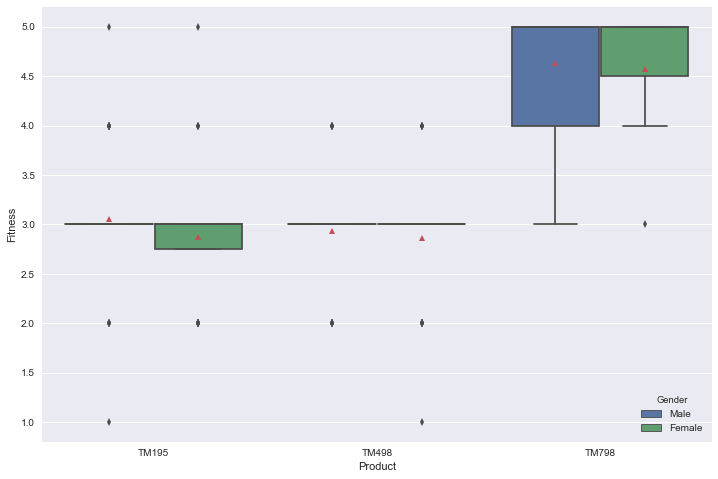

In [212]:
#generating a boxplot with product as x and fitness as y, while differentiating customers based on gender

plt.figure(figsize=(12,8))
sns.boxplot(data['Product'],data['Fitness'], hue = data['Gender'], showmeans=True)

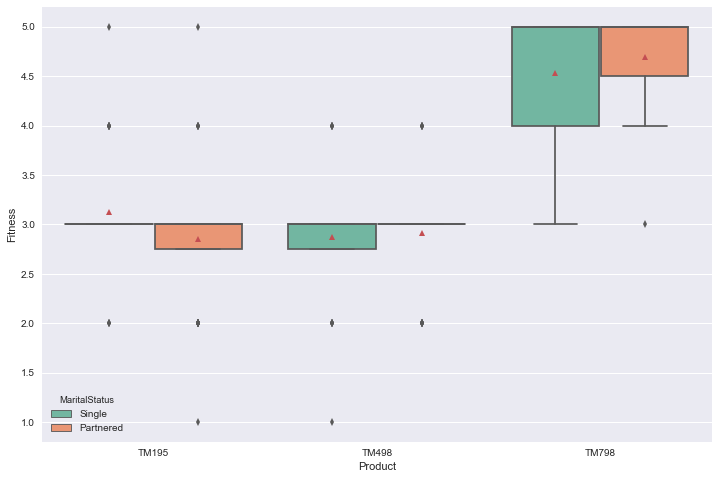

In [236]:
#generating a boxplot with product as x and fitness as y, while differentiating customers based on marital status

plt.figure(figsize=(12,8))
sns.boxplot(data['Product'],data['Fitness'], hue = data['MaritalStatus'], showmeans=True, palette="Set2")

In [244]:
data.groupby('Product')['Fitness'].mean()

Product
TM195    2.9625
TM498    2.9000
TM798    4.6250
Name: Fitness, dtype: float64

In [250]:
data.groupby(by=['Product','Gender'])['Fitness'].mean()

Product  Gender
TM195    Female    2.875000
         Male      3.050000
TM498    Female    2.862069
         Male      2.935484
TM798    Female    4.571429
         Male      4.636364
Name: Fitness, dtype: float64

In [255]:
data.groupby(by=['Product','MaritalStatus'])['Fitness'].mean()

Product  MaritalStatus
TM195    Partnered        2.854167
         Single           3.125000
TM498    Partnered        2.916667
         Single           2.875000
TM798    Partnered        4.695652
         Single           4.529412
Name: Fitness, dtype: float64

In [260]:
data.groupby('Gender')['Fitness'].mean()

Gender
Female    3.026316
Male      3.519231
Name: Fitness, dtype: float64

In [261]:
data.groupby('MaritalStatus')['Fitness'].mean()

MaritalStatus
Partnered    3.271028
Single       3.369863
Name: Fitness, dtype: float64

#### Observations
- Users of TM798 report that they have higher fitness levels compared to the other products.
- Men generally feel more fit compared to women, although only slightly.
- Users of TM195 and TM498 report similar levels of fitness levels, although below users of TM798

### Miles expected across Product

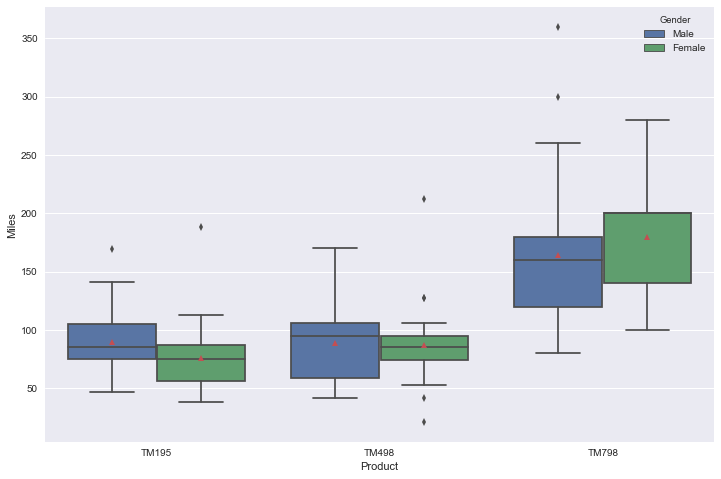

In [214]:
#generating a boxplot with product as x and miles as y, while differentiating customers based on gender

plt.figure(figsize=(12,8))
sns.boxplot(data['Product'],data['Miles'], hue = data['Gender'], showmeans=True)

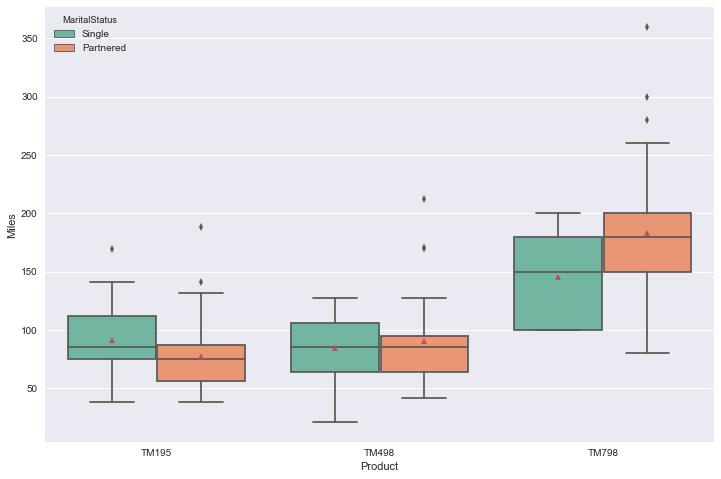

In [237]:
#generating a boxplot with product as x and miles as y, while differentiating customers based on marital status

plt.figure(figsize=(12,8))
sns.boxplot(data['Product'],data['Miles'], hue = data['MaritalStatus'], showmeans=True, palette="Set2")

In [246]:
data.groupby('Product')['Miles'].mean()

Product
TM195     82.787500
TM498     87.933333
TM798    166.900000
Name: Miles, dtype: float64

In [251]:
data.groupby(by=['Product','Gender'])['Miles'].mean()

Product  Gender
TM195    Female     76.200000
         Male       89.375000
TM498    Female     87.344828
         Male       88.483871
TM798    Female    180.000000
         Male      164.121212
Name: Miles, dtype: float64

In [256]:
data.groupby(by=['Product','MaritalStatus'])['Miles'].mean()

Product  MaritalStatus
TM195    Partnered         77.229167
         Single            91.125000
TM498    Partnered         90.055556
         Single            84.750000
TM798    Partnered        183.043478
         Single           145.058824
Name: Miles, dtype: float64

#### Observations
- Users of TM798 expect to run more miles with the product. Generally women of this product expect to run more miles compared to men and married people expect to run more miles compared to single people.
- Male users of TM195 expect to run more miles (although less than those with TM798) compared to women users of TM195.
- Single users of TM195 expect to run more compared to married users of TM195.
- There are almost no difference between TM195 and TM498 users in expectation of miles to be run.
- There are almost no difference between male and female, single or partnered users in expectation of miles to be run for TM498 product.


### Education across Product

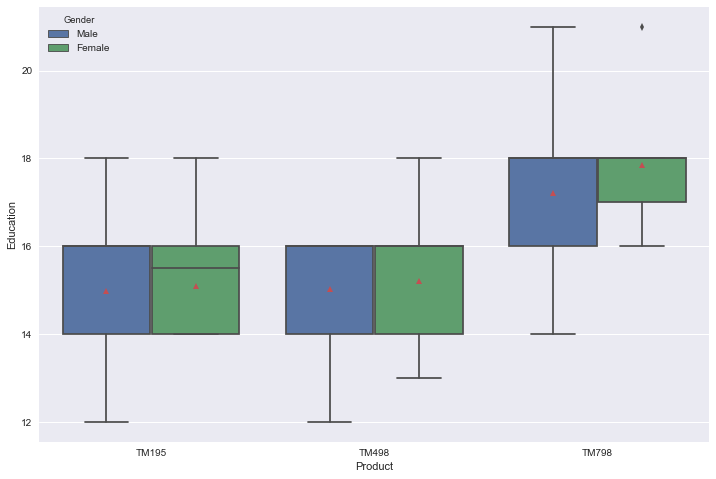

In [216]:
#generating a boxplot with product as x and education as y, while differentiating customers based on gender

plt.figure(figsize=(12,8))
sns.boxplot(data['Product'],data['Education'], hue = data['Gender'], showmeans=True)

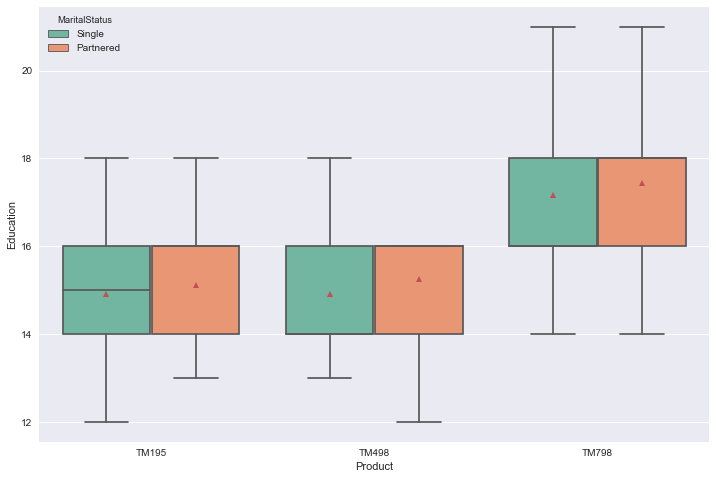

In [238]:
#generating a boxplot with product as x and education as y, while differentiating customers based on marital status

plt.figure(figsize=(12,8))
sns.boxplot(data['Product'],data['Education'], hue = data['MaritalStatus'], showmeans=True, palette="Set2")

In [247]:
data.groupby('Product')['Education'].mean()

Product
TM195    15.037500
TM498    15.116667
TM798    17.325000
Name: Education, dtype: float64

In [252]:
data.groupby(by=['Product','Gender'])['Education'].mean()

Product  Gender
TM195    Female    15.100000
         Male      14.975000
TM498    Female    15.206897
         Male      15.032258
TM798    Female    17.857143
         Male      17.212121
Name: Education, dtype: float64

In [257]:
data.groupby(by=['Product','MaritalStatus'])['Education'].mean()

Product  MaritalStatus
TM195    Partnered        15.125000
         Single           14.906250
TM498    Partnered        15.250000
         Single           14.916667
TM798    Partnered        17.434783
         Single           17.176471
Name: Education, dtype: float64

#### Observations
- Customers of TM798 have higher education years compared to customers of TM195 and TM498. On average, women users of TM798 have slightly higher education years compared to men.
- There are almost no difference between customers of TM195 and TM498 in terms of education years, whether between men or women, or between singled and married people.

## Conclusion

We have analysed the data of 180 customers using three products of Cardio Good Fitness, which are TM195, TM498, and TM798. 
The main feature of interest here is the customer profile of the three products, whether by age, income, education, fitness level, marital status, as well as expectations of usage and miles to be run. 

From the study, it can be concluded that:
1. The users of TM798 are mostly males with higher education and income, who expect to use the product more frequently compared to the other two products. They are also people with higher expectations of their personal fitness levels.
2. The users of TM195 and TM498 are of people of similar profie with lower education and income, who do not expect to use the product as frequently as TM798 users. 
3. The users of the three products have similar age, with 29 years old as average and many between 23 and 35 years old.
4. TM195 users have the highest data count, twice the amount of TM798 users.
5. There are more married users for the three products.
6. Self rated fitness levels, expected miles to run, and expected usage of product correlate well. This shows that those who see themselves fit also see the importance of frequent exercise as a major factor that contribute to fitness.
 

## Recommendations

1. Marketing should be catered differently for these two different segments:

    a. TM798 should be marketed as a premium quality unit with many features, to attract those with more income and expected frequency of product usage. It can be potentially marketed to gyms as well, as a reliable product for very frequent usage.
    
    b. TM195 and TM498 can be marketed as a value for money option, with sufficient basic needs.


2. The retail store should prepare more units/stocks for TM195 as there is considerably higher demand for this product.
3. Marketing should be primarily targeted towards young people, who are around 35 years old and below. 